In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [317]:
#Mbledhja e te dhenave
data = open("C:\\Users\\blend\\OneDrive\\Desktop\\FIEK\\Afati i Qeshorit Semestri 2\\Machine Learning\\Parashikimi i Motit ne Australi\\preprocessed_weatherAUS.csv")

In [318]:
traindata = pd.read_csv(data)

In [319]:
traindata.shape

(56420, 23)

In [320]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3

In [321]:
#përshkrimi ose përmbledhja e të dhënat:
print(traindata.describe(exclude=[object]))

            MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine   
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000  \
mean      13.464770     24.219206      2.130397      5.503135      7.735626   
std        6.416689      6.970676      7.014822      3.696282      3.758153   
min       -6.700000      4.100000      0.000000      0.000000      0.000000   
25%        8.600000     18.700000      0.000000      2.800000      5.000000   
50%       13.200000     23.900000      0.000000      5.000000      8.600000   
75%       18.400000     29.700000      0.600000      7.400000     10.700000   
max       31.400000     48.100000    206.200000     81.200000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm   
count   56420.000000  56420.000000  56420.000000  56420.000000  56420.000000  \
mean       40.877366     15.667228     19.786778     65.874123     49.601985   
std        13.335232      8.317005      8.510180

In [322]:
#Gjetja e veçorive kategorike në grupin e të dhënave:
categorical_features = [column_name for column_name in traindata.columns if traindata[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [323]:
#Gjetja e veçorive numerike në grupin e të dhënave:
numerical_features = [column_name for column_name in traindata.columns if traindata[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [324]:
# heqja e outlier nga veçoritë numerike:
# Pikë e të dhënave që është e largët nga pikat e tjera në grupin e të dhënave. Është një anomali në grupin e të 
# dhënave që mund të shkaktohet nga një sërë gabimesh në kapjen, përpunimin ose manipulimin e të dhënave
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = traindata[feature].quantile(0.25)
    q3 = traindata[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    traindata.loc[traindata[feature]<lower_limit,feature] = lower_limit
    traindata.loc[traindata[feature]>upper_limit,feature] = upper_limit

In [325]:
#Kolona e datës   paraqet disa probleme për modelin në aspektin e
# efikasitetit dhe gjithashtu dimensionet e të dhënave rriten kur kodohen në të dhëna numerike
# prandaj e largojm
traindata.drop('Date', axis = 1, inplace = True)
traindata.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,Cobar,18.4,28.9,0.0,14.3,13.0,S,37.0,SSE,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [326]:
#Konvertimi i të dhënave kategorike  në të dhëna numerike për modelim
def encode_data(feature_name):
    mapping_dict = {}

    unique_values = list(traindata[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict
traindata['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

traindata['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

traindata['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

traindata['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

traindata['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

traindata['Location'].replace(encode_data('Location'), inplace = True)

In [327]:
X = traindata.drop(['RainTomorrow'],axis=1)
y = traindata['RainTomorrow']

In [328]:
# ndarja e te dhenave ne train dhe testa
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [329]:
#Ndarja e datasetit ne 20% testing  dhe 80% training
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 45136
Length of Testing Data: 11284


<Axes: >

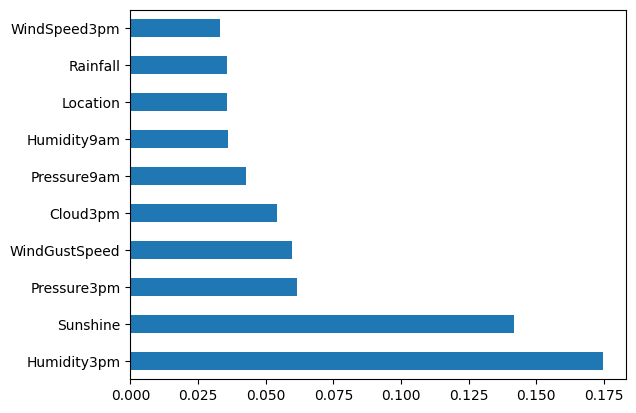

In [330]:
#Nxjerrja e veqorive te rendesishme per te trajnuar modelin
#Feature Importance i referohet teknikave që caktojnë një pikë për veçoritë hyrëse/etiketuar bazuar në atë se sa të dobishme janë ato në parashikimin e një ndryshoreje të synuar

#ExtraTreesRegresso  kjo klasë zbaton një meta-vlerësues që përshtat një numër pemësh vendimesh të rastësishme në mostra të ndryshme të grupit të të dhënave dhe përdor 
# mesataren për të përmirësuar saktësinë parashikuese dhe mbi-përshtatjen e kontrollit

from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

#vizualizimi

feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [331]:
traindata.shape

(56420, 22)

In [332]:
#Shkallezimi i te dhenave
#Shkallëzimi i veçorive është një metodë e përdorur për të normalizuar gamën e variablave të pavarur ose veçorive të të dhënave.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [333]:
#Klasifikimi me LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(solver='liblinear', random_state=0)
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)
y_pred

#llogaritja e accuracy score

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print('Saktesia per Klasifikim me Logistic Regression::',score*100)



Saktesia per Klasifikim me Logistic Regression:: 86.09535625664658


In [334]:
#Klasifikimi me RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()
classifier2.fit(X_train, y_train)

y_pred1 = classifier2.predict(X_test)

score1 = accuracy_score(y_test,y_pred1)
print('Saktesia per Klasifikim me Random Forest:',score*100)

Saktesia per Klasifikim me Random Forest: 86.09535625664658


In [335]:
#Klasifikimi me KNN
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 5)
classifier3.fit(X_train,y_train)

y_pred2 = classifier3.predict(X_test)
score2 = accuracy_score(y_test,y_pred2)
print('Saktesia per Klasifikim me KNN:',score*100)

Saktesia per Klasifikim me KNN: 86.09535625664658


In [336]:
#Klasifikimi me Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train, y_train)

y_pred3 = classifier4.predict(X_test)
score3 = classifier4.score(X_test, y_test)
print('Saktesia per Klasifikim me Naive Bayes:',score*100)

Saktesia per Klasifikim me Naive Bayes: 86.09535625664658


In [337]:
#Klasifikimi me Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(random_state=9)
classifier5.fit(X_train, y_train)
y_pred4 = classifier5.predict(X_test)
score4 = classifier5.score(X_test, y_test)
print('Saktesia per Klasifikim me DecisionTreeClassifier:',score*100)

Saktesia per Klasifikim me DecisionTreeClassifier: 86.09535625664658


In [338]:
                                                                       # Faza 3                            

In [339]:
# Checking for Underfitting and Overfitting Logistic Regression
print("Train Data Score: {}".format(classifier1.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier1.score(X_test, y_test)))

Train Data Score: 0.853287841191067
Test Data Score: 0.8609535625664658


In [340]:
# Confusion Matrix Logistic Regession
#Një Matricë Konfuzioni përdoret për të përmbledhur performancën e problemit të klasifikimit. Ai jep një pamje holistike se sa mirë po performon modeli.

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[8330  524]
 [1045 1385]]


In [341]:
# classification report Logistic Regession.

from sklearn.metrics import classification_report
y_test_pred = classifier1.predict(X_test)
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8854
           1       0.73      0.57      0.64      2430

    accuracy                           0.86     11284
   macro avg       0.81      0.76      0.78     11284
weighted avg       0.85      0.86      0.85     11284



In [342]:
# Checking for Underfitting and Overfitting Random Forest
print("Train Data Score: {}".format(classifier2.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier2.score(X_test, y_test)))

Train Data Score: 1.0
Test Data Score: 0.8662708259482453


In [343]:
# Confusion Matrix Random Forest
#Një Matricë Konfuzioni përdoret për të përmbledhur performancën e problemit të klasifikimit. Ai jep një pamje holistike se sa mirë po performon modeli.

matrix1 = confusion_matrix(y_test,y_pred1)
print(matrix1)

[[8448  406]
 [1103 1327]]


In [344]:
# classification report Random Forest.

y_test_pred = classifier2.predict(X_test)
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.92      8854
           1       0.77      0.55      0.64      2430

    accuracy                           0.87     11284
   macro avg       0.83      0.75      0.78     11284
weighted avg       0.86      0.87      0.86     11284



In [345]:
# Checking for Underfitting and Overfitting KNN
print("Train Data Score: {}".format(classifier3.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier3.score(X_test, y_test)))

Train Data Score: 0.8848812477844736
Test Data Score: 0.8442041829138603


In [346]:
# Confusion Matrix KNN
#Një Matricë Konfuzioni përdoret për të përmbledhur performancën e problemit të klasifikimit. Ai jep një pamje holistike se sa mirë po performon modeli.

matrix2 = confusion_matrix(y_test,y_pred2)
print(matrix2)

[[8244  610]
 [1148 1282]]


In [347]:
# classification report KNN.

y_test_pred = classifier3.predict(X_test)
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8854
           1       0.68      0.53      0.59      2430

    accuracy                           0.84     11284
   macro avg       0.78      0.73      0.75     11284
weighted avg       0.83      0.84      0.84     11284



In [348]:
# Checking for Underfitting and Overfitting Naive Bayes
print("Train Data Score: {}".format(classifier4.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier4.score(X_test, y_test)))

Train Data Score: 0.7868442041829139
Test Data Score: 0.7852711804324708


In [349]:
# Confusion Matrix Naive Bayes
#Një Matricë Konfuzioni përdoret për të përmbledhur performancën e problemit të klasifikimit. Ai jep një pamje holistike se sa mirë po performon modeli.

matrix3 = confusion_matrix(y_test,y_pred3)
print(matrix3)


[[7106 1748]
 [ 675 1755]]


In [350]:
# classification report Naive Bayes.

y_test_pred = classifier4.predict(X_test)
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.91      0.80      0.85      8854
           1       0.50      0.72      0.59      2430

    accuracy                           0.79     11284
   macro avg       0.71      0.76      0.72     11284
weighted avg       0.82      0.79      0.80     11284



In [351]:
# Checking for Underfitting and Overfitting Decision Tree
print("Train Data Score: {}".format(classifier5.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier5.score(X_test, y_test)))

Train Data Score: 1.0
Test Data Score: 0.7969691598723857


In [352]:
# Confusion Matrix Decision Tree
#Një Matricë Konfuzioni përdoret për të përmbledhur performancën e problemit të klasifikimit. Ai jep një pamje holistike se sa mirë po performon modeli.
matrix4 = confusion_matrix(y_test,y_pred4)
print(matrix4)

[[7641 1213]
 [1078 1352]]


In [353]:
# classification report Decision Tree.
y_test_pred = classifier5.predict(X_test)
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8854
           1       0.53      0.56      0.54      2430

    accuracy                           0.80     11284
   macro avg       0.70      0.71      0.71     11284
weighted avg       0.80      0.80      0.80     11284



In [356]:
Testscores = pd.Series([score, score1, score2, score3, score4, ], 
                        index=['Logistic Regression Score', 'Random Forest Machine Score', 'K-Nearest Neighbour Score', 'Naive Bayes Score', 'Decision Tree Score', ]) 
print(Testscores)

Logistic Regression Score      0.860954
Random Forest Machine Score    0.866271
K-Nearest Neighbour Score      0.844204
Naive Bayes Score              0.785271
Decision Tree Score            0.796969
dtype: float64


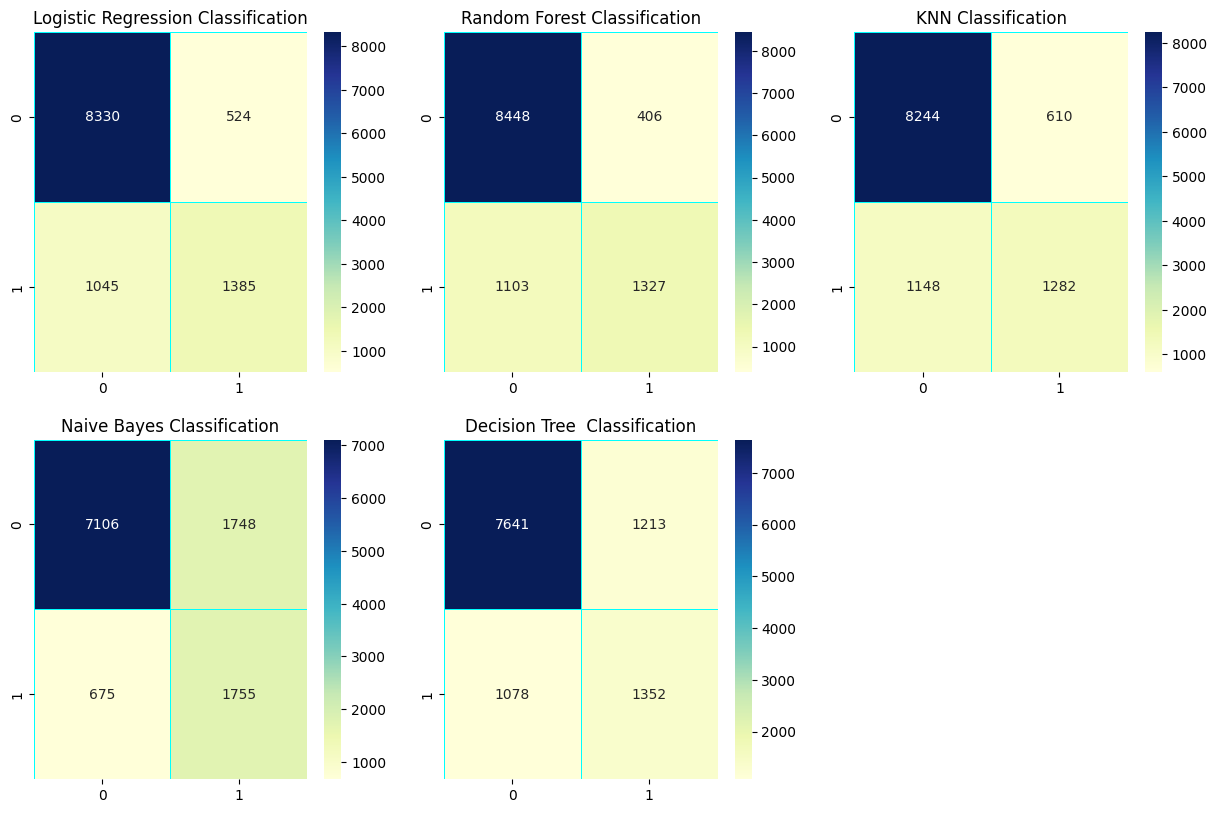

In [357]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('Random Forest Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('KNN Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Naive Bayes Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Decision Tree  Classification')

sns.heatmap(data=matrix, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=matrix1, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=matrix2, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=matrix3, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)
sns.heatmap(data=matrix4, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
plt.show()